In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist

In [17]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [18]:
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)


print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )


# now we normalize our data
X_train = X_train/255
X_test = X_test/255

The current size of our dataset is : 
X_train ->  (60000, 784) 
y_train ->  (60000,) 
X_test ->  (10000, 784) 
y_test (10000,)


In [19]:
X_train_small,y_train_small = X_train[:30000],y_train[:30000] 
X_test_small,y_test_small = X_test[:5000],y_test[:5000] 

from sklearn.ensemble import RandomForestClassifier
'''
We're building a Random Forest with 100 decision trees, 
and setting seed for randomness to a fixed value 42 so the model 
behaves the same every time we train it'''
rand_forest = RandomForestClassifier(n_estimators=100,random_state=42)
rand_forest.fit(X_train_small, y_train_small)

y_pred = rand_forest.predict(X_test_small)

original_accuracy = np.sum(y_pred == y_test[:5000]) / len(y_test[:5000])

print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test[:1000][:50]}")
print(f"original_accuracy: {original_accuracy * 100:.2f}%")

'''
Using Random Forest, we get a better original_accuracy compared to a 
single decision tree. It works by combining multiple decision trees, so 
its better at handling clusters of overlapping digits like (3,8,2), (6,5),(4,9). 
Still, overlaps confuse even the forest, but it reduces 
overfitting and gives more stable predictions.
the original_accuracy is improving as the n_estimators (trees) are increasing but the 
the time complexity also increases 
'''


Predicted labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
Actual labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
original_accuracy: 94.78%


'\nUsing Random Forest, we get a better original_accuracy compared to a \nsingle decision tree. It works by combining multiple decision trees, so \nits better at handling clusters of overlapping digits like (3,8,2), (6,5),(4,9). \nStill, overlaps confuse even the forest, but it reduces \noverfitting and gives more stable predictions.\nthe original_accuracy is improving as the n_estimators (trees) are increasing but the \nthe time complexity also increases \n'

In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_test[:5000], y_pred[:5000], output_dict=True)
    
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

{'original_accuracy': original_accuracy,'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Model': rand_forest.__class__.__name__}

{'original_accuracy': np.float64(0.9478),
 'Precision': 0.9480250025125581,
 'Recall': 0.9478,
 'F1-Score': 0.9477317045556072,
 'Model': 'RandomForestClassifier'}

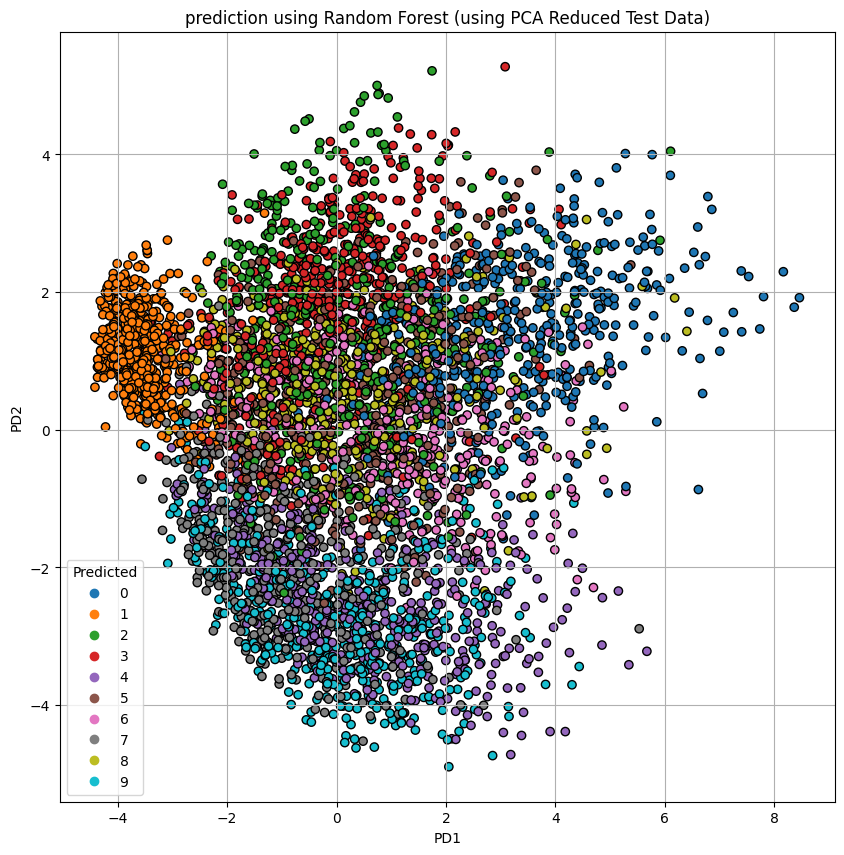

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_small)
plt.figure(figsize=(10,10))
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(),title='Predicted')
plt.title("prediction using Random Forest (using PCA Reduced Test Data)")
plt.xlabel("PD1")
plt.ylabel("PD2")
plt.grid(True)
plt.show()

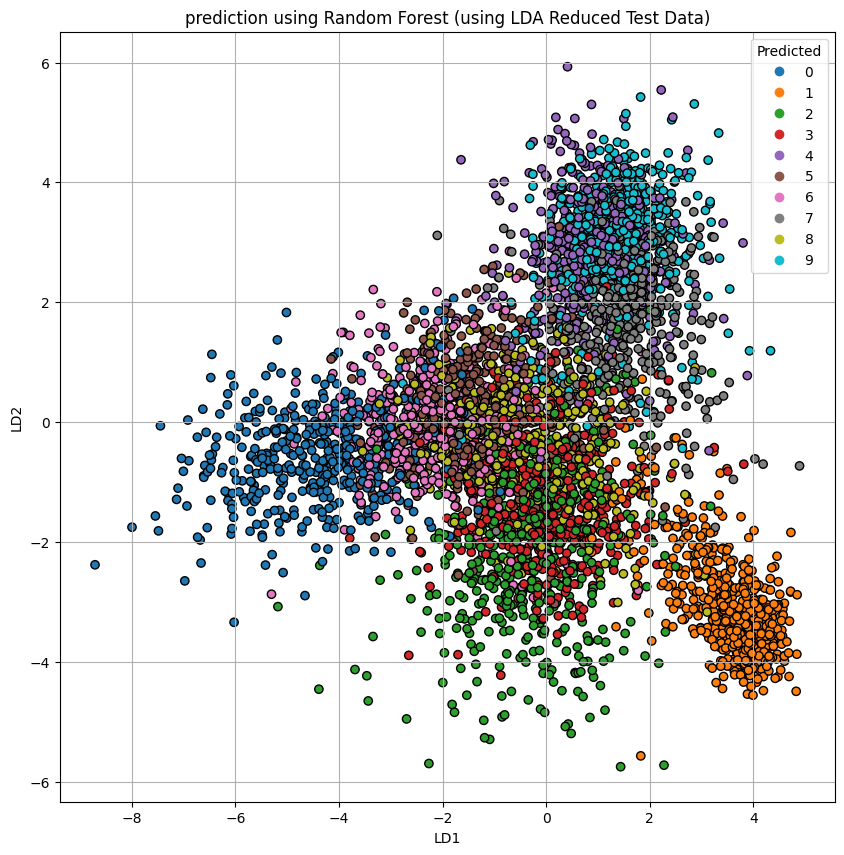

'\nWe observe that the original_accuracy is around 84.10%. \nA lot of the digits overlap,like (3,8,2,6), (6,5), and (4,9), which \ncauses the decision tree to struggle in these overlapping areas, but\nhere since we a using combination of multiple decision trees \nwe get better results\n'

In [22]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_small, y_test_small)

'''
Here, we reduced the test data (X_test_small) into 2D using LDA, 
which tries to separate classes based on the true labels (y_test_small).
Then we visualized the predicted labels (y_pred) using colors.
If the same-colored points cluster together, it means the model is 
doing a decent job.
However, we notice overlaps (like between 3,8,2,6), which 
likely confused the model, leading to lower original_accuracy.
'''
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using Random Forest (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()

'''
We observe that the original_accuracy is around 84.10%. 
A lot of the digits overlap,like (3,8,2,6), (6,5), and (4,9), which 
causes the decision tree to struggle in these overlapping areas, but
here since we a using combination of multiple decision trees 
we get better results
'''


c:\Users\anshb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


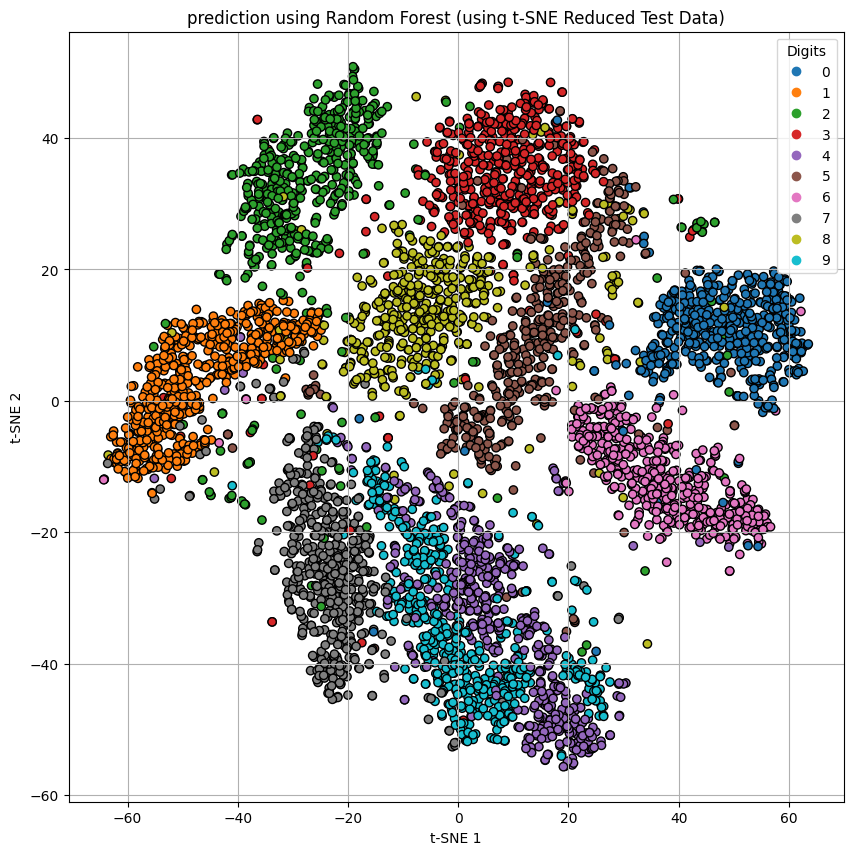

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50,n_iter=1000,n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X_test_small)

plt.figure(figsize=(10,10))
scatter = plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("prediction using Random Forest (using t-SNE Reduced Test Data)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

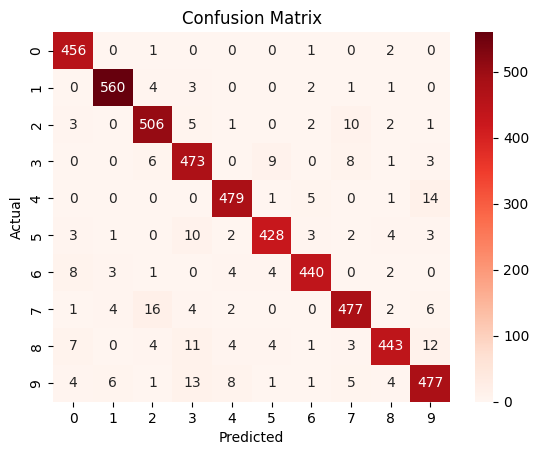

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_small, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

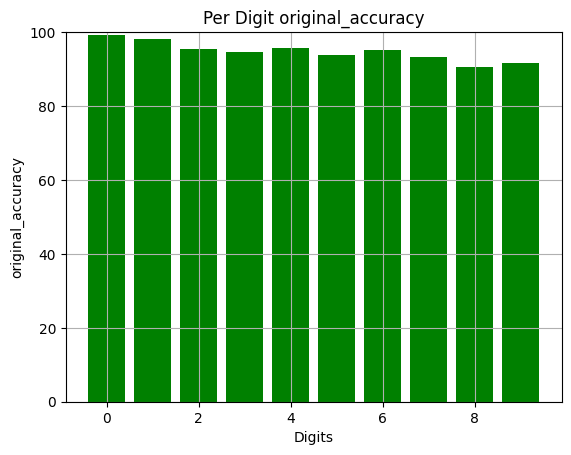

In [25]:
import numpy as np

accuracies = []
for digit in range(10):
    idx = (y_test_small == digit)
    correct = (y_pred[idx] == digit).sum()
    total = idx.sum()
    accuracies.append(correct / total * 100)

plt.bar(range(10), accuracies, color='green')
plt.xlabel("Digits")
plt.ylabel("original_accuracy")
plt.title("Per Digit original_accuracy")
plt.ylim(0, 100)
plt.grid(True)
plt.show()


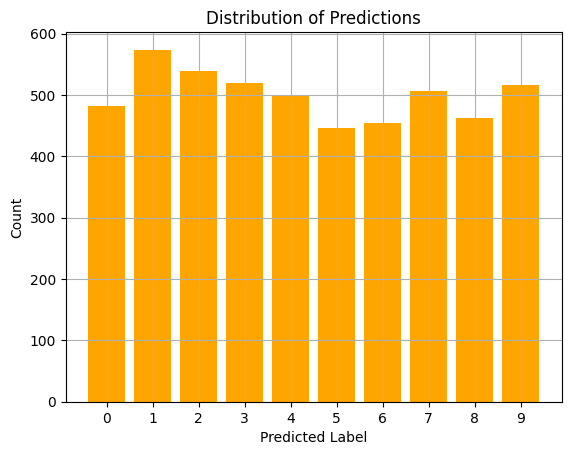

In [26]:
plt.hist(y_pred, bins=np.arange(11)-0.5, rwidth=0.8, color='orange')
plt.xticks(range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Distribution of Predictions")
plt.grid(True)
plt.show()


In [27]:
def rbf_kernel(X, Y, gamma=1e-3):
    XX = np.sum(X**2, axis=1).reshape(-1, 1)
    YY = np.sum(Y**2, axis=1).reshape(1, -1)
    dist = XX + YY - 2 * np.dot(X, Y.T)
    return np.exp(-gamma * dist)

def compute_mmd(X, Y, gamma=1e-3):
    K_xx = rbf_kernel(X, X, gamma)
    K_yy = rbf_kernel(Y, Y, gamma)
    K_xy = rbf_kernel(X, Y, gamma)
    m, n = X.shape[0], Y.shape[0]
    return np.sum(K_xx)/(m**2) + np.sum(K_yy)/(n**2) - 2*np.sum(K_xy)/(m*n)

samples_per_class = 3000
digit_data = {i: X_train[y_train == i][:samples_per_class] for i in range(10)}

mmd_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        mmd_matrix[i, j] = compute_mmd(digit_data[i], digit_data[j])

avg_mmd = np.mean(mmd_matrix, axis=1)
print(f"\nAverage MMD per class: {np.round(avg_mmd, 4)}")

import scipy.special
class_weights = scipy.special.softmax(avg_mmd)


sample_weights = np.array([class_weights[label] for label in y_train_small])

clf_weighted = RandomForestClassifier(n_estimators=100,random_state=42)
clf_weighted.fit(X_train_small, y_train_small, sample_weight=sample_weights)
y_pred_weighted = clf_weighted.predict(X_test_small)
weighted_accuracy = np.mean(y_pred_weighted == y_test_small)

print(f"\nMMD-Weighted original_accuracy: {weighted_accuracy * 100:.2f}%")
print(f"Change in original_accuracy: {(weighted_accuracy - original_accuracy) * 100:.2f}%")


Average MMD per class: [0.0589 0.0516 0.0365 0.0379 0.0364 0.0284 0.0412 0.0418 0.0309 0.0329]

MMD-Weighted original_accuracy: 94.78%
Change in original_accuracy: 0.00%


In [33]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.linalg import fractional_matrix_power

def coral(source, target, regularization=1e-3):
    cov_source = np.cov(source, rowvar=False) + regularization * np.eye(source.shape[1])
    cov_target = np.cov(target, rowvar=False) + regularization * np.eye(target.shape[1])
    cov_source_sqrt = fractional_matrix_power(cov_source, 0.5)
    cov_target_sqrt_inv = fractional_matrix_power(cov_target, -0.5)
    aligned_target = (target - target.mean(axis=0)) @ cov_target_sqrt_inv @ cov_source_sqrt + source.mean(axis=0)
    return aligned_target

n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test_small)

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_pca, y_train_small)

X_test_aligned = coral(X_train_pca, X_test_pca)

y_pred_coral = rand_forest.predict(X_test_aligned)
coral_accuracy = accuracy_score(y_test_small, y_pred_coral)
print(f"CORAL-Aligned Accuracy: {coral_accuracy * 100:.2f}%")
print(f"Accuracy change: {(coral_accuracy - original_accuracy) * 100:.2f}%")

CORAL-Aligned Accuracy: 91.52%
Accuracy change: -3.26%
